<a href="https://colab.research.google.com/github/kamadomin/PyTorchLearning/blob/main/Simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [70]:


# Define a neural network model for classifying Iris flowers
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        """
        Parameters:
        in_features : int
            Number of input features (for Iris dataset, it's 4: sepal length, sepal width, petal length, petal width)
        h1 : int
            Number of neurons in the first hidden layer
        h2 : int
            Number of neurons in the second hidden layer
        out_features : int
            Number of output classes (Iris dataset has 3 classes)
        """
        super(Model, self).__init__()  # initialize the nn.Module parent class

        # Define layers
        self.fc1 = nn.Linear(in_features, h1)   # First hidden layer
        self.fc2 = nn.Linear(h1, h2)            # Second hidden layer
        self.out = nn.Linear(h2, out_features)  # Output layer

    def forward(self, x):
        """
        Defines the forward pass of the network
        """
        x = F.relu(self.fc1(x))  # Apply ReLU after first hidden layer
        x = F.relu(self.fc2(x))  # Apply ReLU after second hidden layer
        x = self.out(x)          # Final output (no activation here, as we'll apply CrossEntropyLoss later)
        return x


Input layer

Iris dataset has 4 features per flower (e.g., sepal length, sepal width, petal length, petal width).

That’s why in_features=4.

Hidden layers

First hidden layer: 8 neurons (h1=8).

Second hidden layer: 9 neurons (h2=9).

Both use ReLU activation to introduce non-linearity.

Output layer

There are 3 Iris classes (Setosa, Versicolor, Virginica).

So out_features=3.

No activation applied, since PyTorch’s nn.CrossEntropyLoss applies Softmax internally.

Forward pass

Data flows through the layers:
input → fc1 → ReLU → fc2 → ReLU → output logits


In [71]:
# Pick a manual seed for randomization
torch.manual_seed(32)

# Create an instance of model
model = Model()


##Why is this important?

When you create a neural network in PyTorch, the weights are initialized randomly.

If you don’t set a seed, every run will start with different initial weights.

If you set a seed, the randomness becomes deterministic → same weights each time.

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [73]:
url ='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [74]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [76]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2)

my_df


/tmp/ipython-input-97376796.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [77]:
X = my_df.drop('species', axis=1)
y = my_df['species']

In [78]:
# convert these to numpy values
X = X.values
y = y.values


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [81]:
# Convert to tensors, float becasue the numbers in the dataset are decimals
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)



In [82]:
# Convert labels to tensors:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [83]:
# set the criterion of the model to measure the error, how far off the predicitons are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optizer, learing rate lr (if error doesn't go dwon after a bunch of iteration (epoch) we need to lower lr)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#

In [84]:
# tranin the model
#Epoch (one run through all the training data in our network)
epoch = 100
losses = []

for i in range(epoch):
  #go forward and get a prediction
  y_pred = model.forward(X_train) # get prediciton results

  #Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predictin values vs the y_train

  # keep track of our losses
  losses.append(loss.detach().numpy())

  #print evry 10 epoch
  if i %10==0:
    print(f'Epoch: {i} and loss: {loss}')

  #Do some back propagation: take the error rate of forward propagation and feed it back thru the network to fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.169895887374878
Epoch: 10 and loss: 0.9578844308853149
Epoch: 20 and loss: 0.7988812923431396
Epoch: 30 and loss: 0.634953498840332
Epoch: 40 and loss: 0.44043001532554626
Epoch: 50 and loss: 0.291716992855072
Epoch: 60 and loss: 0.17829042673110962
Epoch: 70 and loss: 0.11587586998939514
Epoch: 80 and loss: 0.08928147703409195
Epoch: 90 and loss: 0.07743765413761139


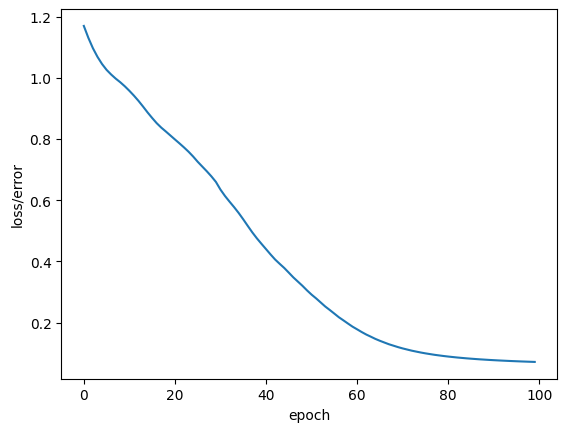

In [85]:
# plot

plt.plot(range(epoch),losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")
plt.show()

In [86]:
# Eavluate Model on the test data set (validate model on test set)

with torch.no_grad():  #basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set which is about 30, y_eval will be predictions
  loss = criterion(y_eval, y_test)
  print(f'Loss: {loss}')

Loss: 0.05391683429479599


We would like this loss to be of the same order as the loss for the last epoch, so we need to check what is going on.

In [87]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')




#correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} out of {len(y_test)}')

1.) tensor([-3.3580,  3.9452,  0.3616]) 	 1 	 1
2.) tensor([  7.5862,   1.1113, -11.3861]) 	 0 	 0
3.) tensor([  6.6288,   1.5092, -10.4603]) 	 0 	 0
4.) tensor([-3.3304,  4.2647,  0.0569]) 	 1 	 1
5.) tensor([-7.3705,  2.8135,  5.1481]) 	 2 	 2
6.) tensor([-7.3749,  3.9061,  4.2781]) 	 2 	 2
7.) tensor([  6.2304,   1.6527, -10.0543]) 	 0 	 0
8.) tensor([  6.8783,   1.4056, -10.7016]) 	 0 	 0
9.) tensor([-2.6728,  4.3138, -0.6444]) 	 1 	 1
10.) tensor([  7.2201,   1.3890, -11.1494]) 	 0 	 0
11.) tensor([-3.8269,  4.4110,  0.5165]) 	 1 	 1
12.) tensor([-8.6886,  1.9990,  6.9012]) 	 2 	 2
13.) tensor([-2.0605,  3.8275, -0.7672]) 	 1 	 1
14.) tensor([-1.0676,  4.3809, -2.2975]) 	 1 	 1
15.) tensor([-7.5000,  2.6230,  5.3318]) 	 2 	 2
16.) tensor([-8.6214,  1.5491,  7.1280]) 	 2 	 2
17.) tensor([-3.7724,  3.6503,  0.9422]) 	 1 	 1
18.) tensor([-6.7624,  2.7791,  4.5289]) 	 2 	 2
19.) tensor([-1.6978,  4.2047, -1.4772]) 	 1 	 1
20.) tensor([  7.8104,   1.3824, -11.9435]) 	 0 	 0
21.) tensor

In [91]:
# new data should be 0

new_iris = torch.tensor([4.9,	3.0	,1.4,	0.2	])


In [92]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([  6.6422,   1.4104, -10.3860])


In [100]:
model(new_iris)   # recommended ✅
model.forward(new_iris)  # works, but bypasses hooks ❌


tensor([  6.6422,   1.4104, -10.3860], grad_fn=<ViewBackward0>)

In [95]:
output = model(new_iris)

it actually runs model.__call__(new_iris), which:

Handles hooks (important for debugging, custom layers, autograd, etc.).

Calls your forward() method internally.

. Why it matters

If you call forward() directly, you skip PyTorch’s internal machinery, like:

register_forward_hook / register_backward_hook

gradient tracking (autograd)

This can lead to bugs in more complex models.

For simple feed-forward networks like Iris, you won’t see an error, but in serious code you’ll almost never see forward() used directly.

In [96]:
#Convert logits → probabilities gpt
probs = torch.softmax(output, dim=0)
print(probs)

tensor([9.9468e-01, 5.3156e-03, 4.0034e-08], grad_fn=<SoftmaxBackward0>)


In [99]:
predicted_class = torch.argmax(output).item()
predicted_class


0

Totally—here’s what was off in your original loop and why:

You called model.forward(X_train)

❌ Calls forward directly and bypasses PyTorch’s hooks/autograd machinery.

✅ Use model(X_train) instead.

You stored loss with .detach().numpy()

❌ On GPU this breaks (needs .cpu()), and for a scalar it’s clunky.

✅ Use loss.item() to get a plain Python float.

You didn’t set training mode

❌ Missing model.train() (matters if you add dropout/batchnorm later).

✅ Call once before the loop.

No validation / no best-model selection

❌ You only tracked train loss; can hide overfitting.

✅ Evaluate on a val set each epoch and keep the best weights.

Full-batch training without shuffle

❌ Feeding the entire X_train each step with no shuffling can slow/unstabilize learning.

✅ Prefer a DataLoader(..., shuffle=True) with mini-batches (optional but standard).

Potential dtype pitfalls (common with this setup)

❗ Ensure X_train.dtype == torch.float32 and y_train.dtype == torch.long; labels must be class indices (not one-hot) for CrossEntropyLoss.

Don’t add Softmax in the model

❗ CrossEntropyLoss expects raw logits; adding Softmax in the model would double-apply it.